In [1]:
import pandas as pd
import geopandas as gpd
import folium
from folium import Choropleth, Map

import warnings
warnings.filterwarnings('ignore')

c:\softwares\python3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\softwares\python3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\softwares\python3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [10]:
def embed_map(m, filename):
    from IPython.display import IFrame
    m.save(filename)
    return IFrame(filename, width='100%', height='700px')  

In [2]:
df = pd.read_csv('data/maternal-mortality.csv')
df.head()

,Entity,Code,Year,Maternal Mortality Ratio (Gapminder (2010) and World Bank (2015))
0,Afghanistan,AFG,1990,1340.0
1,Afghanistan,AFG,1991,1330.0
2,Afghanistan,AFG,1992,1330.0
3,Afghanistan,AFG,1993,1320.0
4,Afghanistan,AFG,1994,1300.0


In [3]:
# Data clean up

# 1. Rename columns
df.rename(columns={'Maternal Mortality Ratio (Gapminder (2010) and World Bank (2015))': 'maternal_mortality',
                   'Code': 'iso_a3'}, inplace=True)

# Check if there are Nan values 
df[df['maternal_mortality'].isna()]

,Entity,iso_a3,Year,maternal_mortality


### TASK 1 : Plot values of maternal mortality over the map. Show the values when you point to a country

In [4]:
# First merge the data frame with the world data
worldfilepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(worldfilepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [5]:
df.Year.value_counts()

2015    229
1992    229
2000    229
2004    229
2008    229
       ... 
1810      2
1800      2
1818      1
1807      1
1814      1
Name: Year, Length: 206, dtype: int64

#### 2015 

In [15]:
df_2015 = df[df['Year'] == 2015].copy()
merged_df = df_2015.merge(world, on='iso_a3')
merged_df.head()

,Entity,iso_a3,Year,maternal_mortality,pop_est,continent,name,gdp_md_est,geometry
0,Afghanistan,AFG,2015,396.0,34124811,Asia,Afghanistan,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,Albania,ALB,2015,29.0,3047987,Europe,Albania,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
2,Algeria,DZA,2015,140.0,40969443,Africa,Algeria,609400.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
3,Angola,AGO,2015,477.0,29310273,Africa,Angola,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
4,Argentina,ARG,2015,52.0,44293293,South America,Argentina,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


In [18]:
# Create a map
m = Map(location=[0.0, 0.0], tiles='openstreetmap', zoom_start=3)

gdf = gpd.GeoDataFrame(merged_df, crs='EPSG:4326')

gdf_idx = gdf.set_index("iso_a3")
merged_df_idx = merged_df.set_index("iso_a3")

Choropleth(geo_data=gdf_idx.__geo_interface__,
           data=merged_df_idx['maternal_mortality'],
           fill_color='YlGnBu',
           key_on='feature.id',
           legend_name='Maternal Mortality Ratio in 2015').add_to(m)
embed_map(m, 'maternal_mortality_non_interactive.html')

In [19]:
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}

layer = folium.features.GeoJson(
    gdf,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['Entity','maternal_mortality'],
        aliases=['Country: ','Maternal Mortality Ratio: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
m.add_child(layer)
m.keep_in_front(layer)
folium.LayerControl().add_to(m)

embed_map(m, 'Maternal_mortality_interactive.html')

### TASK 2 : Plot values for the whole continent

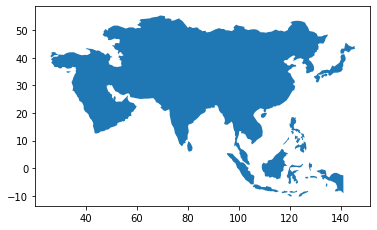

In [44]:
geom_data = gdf[['continent', 'geometry']]
continents = geom_data.dissolve(by='continent')
continents[continents.index == 'Asia'].plot()

In [45]:
continents.head()

,geometry
continent,
Africa,"MULTIPOLYGON (((32.830 -26.742, 32.580 -27.470..."
Asia,"MULTIPOLYGON (((120.295 -10.259, 118.968 -9.55..."
Europe,"MULTIPOLYGON (((26.290 35.300, 26.165 35.005, ..."
North America,"MULTIPOLYGON (((-61.680 10.760, -61.105 10.890..."
Oceania,"MULTIPOLYGON (((169.668 -43.555, 170.525 -43.0..."


In [46]:
continents_gdf = gpd.GeoDataFrame(continents, crs='EPSG:4326')
continents_gdf.head()

,geometry
continent,
Africa,"MULTIPOLYGON (((32.830 -26.742, 32.580 -27.470..."
Asia,"MULTIPOLYGON (((120.295 -10.259, 118.968 -9.55..."
Europe,"MULTIPOLYGON (((26.290 35.300, 26.165 35.005, ..."
North America,"MULTIPOLYGON (((-61.680 10.760, -61.105 10.890..."
Oceania,"MULTIPOLYGON (((169.668 -43.555, 170.525 -43.0..."


In [43]:
data_mean = merged_df_idx.groupby('continent').mean()
data_mean.head()

,Year,maternal_mortality,pop_est,gdp_md_est
continent,,,,
Africa,2015.0,462.469388,2.479741e+07,1.226967e+05
Asia,2015.0,81.488889,9.700825e+07,1.206756e+06
Europe,2015.0,10.222222,1.866881e+07,6.167413e+05
North America,2015.0,80.176471,3.370496e+07,1.382527e+06
Oceania,2015.0,75.666667,6.083962e+06,2.336858e+05


In [ ]:
m = Map([0.0, 0.0], tiles='openstreetmap', zoom_start=3)
Choropleth()